# Cross Validating BartPy Models

Using the sklearn interface, we can plug BartPy models into existing sklearn pipelines for feature engineering, scoring and parameter tuning.


In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

from bartpy.sklearnmodel import SklearnModel

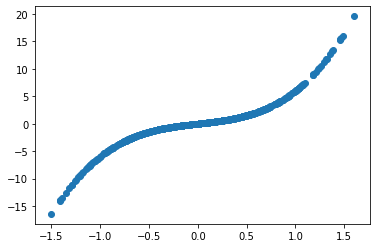

In [2]:
# Start by creating some synthetic data to play with

x = np.random.normal(0, 0.5, size=1000)
X = pd.DataFrame({"x": x})
y = 2 * x + 4 * np.power(x, 3)
plt.scatter(x, y)

In [3]:
# Create an instance of the Sklearn class
# Set parameters to make the model very small and fast for exposition purposes
model = SklearnModel(n_burn=50, n_chains=1, n_jobs=1, n_samples=50, n_trees=10)

  0%|          | 0/50 [00:00<?, ?it/s]Starting burn
Starting sampling
100%|██████████| 50/50 [00:00<00:00, 243.16it/s]


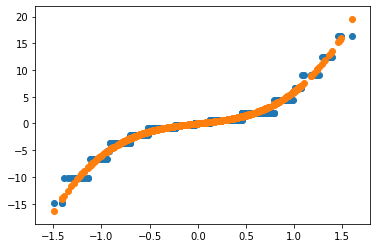

In [5]:
# Quickly train and visually inspect that the results look good
model.fit(X, y)
plt.scatter(x, model.predict(X))
plt.scatter(x, y)

In [6]:
# Score the model using cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y)
scores

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
  0%|          | 0/50 [00:00<?, ?it/s]Starting sampling
Starting burn
100%|██████████| 50/50 [00:00<00:00, 255.65it/s]
Starting sampling
100%|██████████| 50/50 [00:00<00:00, 250.97it/s]
Starting burn
Starting sampling


array([0.95914021, 0.9582215 , 0.96570954])

In [7]:
# Search for the best parameters using GridSearch
from sklearn.model_selection import GridSearchCV
parameters = {'n_trees': (10, 20, 50)}
grid_search = GridSearchCV(model, parameters)
grid_search.fit(X, y)
grid_search.best_params_

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
100%|██████████| 50/50 [00:00<00:00, 256.24it/s]
Starting sampling
100%|██████████| 50/50 [00:01<00:00, 48.37it/s]


{'n_trees': 50}